<a href="https://colab.research.google.com/github/ossnat/brain2text2025/blob/main/brain2txt_visualise_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
paulnkamau_brain_to_text_25_data_path = kagglehub.dataset_download('paulnkamau/brain-to-text-25-data')

print('Data source import complete.')


100%|██████████| 10.8G/10.8G [02:05<00:00, 92.8MB/s]

Extracting files...


Data source import complete.


In [ ]:
# @title
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
import h5py

def load_h5py_file(file_path):
    data = {
        'neural_features': [],
        'n_time_steps': [],
        'seq_class_ids': [],
        'seq_len': [],
        'transcriptions': [],
        'sentence_label': [],
        'session': [],
        'block_num': [],
        'trial_num': [],
    }
    # Open the hdf5 file for that day
    with h5py.File(file_path, 'r') as f:

        keys = list(f.keys())

        # For each trial in the selected trials in that day
        for key in keys:
            g = f[key]

            neural_features = g['input_features'][:]
            n_time_steps = g.attrs['n_time_steps']
            seq_class_ids = g['seq_class_ids'][:] if 'seq_class_ids' in g else None
            seq_len = g.attrs['seq_len'] if 'seq_len' in g.attrs else None
            transcription = g['transcription'][:] if 'transcription' in g else None
            sentence_label = g.attrs['sentence_label'][:] if 'sentence_label' in g.attrs else None
            session = g.attrs['session']
            block_num = g.attrs['block_num']
            trial_num = g.attrs['trial_num']

            data['neural_features'].append(neural_features)
            data['n_time_steps'].append(n_time_steps)
            data['seq_class_ids'].append(seq_class_ids)
            data['seq_len'].append(seq_len)
            data['transcriptions'].append(transcription)
            data['sentence_label'].append(sentence_label)
            data['session'].append(session)
            data['block_num'].append(block_num)
            data['trial_num'].append(trial_num)
    return data



In [ ]:
file_path = '/root/.cache/kagglehub/datasets/paulnkamau/brain-to-text-25-data/versions/3/t15_copyTask_neuralData/hdf5_data_final/t15.2024.03.08/data_train.hdf5'
data = load_h5py_file(file_path)

In [ ]:
data.keys()

dict_keys(['neural_features', 'n_time_steps', 'seq_class_ids', 'seq_len', 'transcriptions', 'sentence_label', 'session', 'block_num', 'trial_num'])

Number of trials: 163

--- Information for Trial 19 ---
Sentence Label: I consider it to be a chore.
Trial Number: 1
Sequence Length: 25
Transcription: [ 73  32  99 111 110 115 105 100 101 114  32 105 116  32 116 111  32  98
 101  32  97  32  99 104 111 114 101  46   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0 

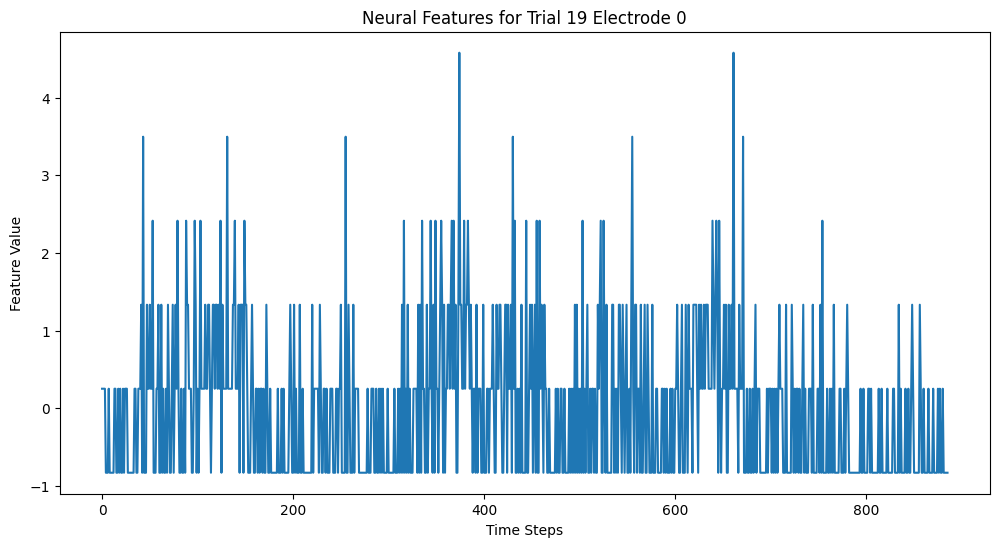

In [ ]:
# Display the number of trials in this session
num_trials = len(data['neural_features'])
print(f"Number of trials: {num_trials}")

# Let the user choose an example index
trial_index = 19
electrode_index = 0

# Display information for the chosen trial
if 0 <= trial_index < num_trials:
    print(f"\n--- Information for Trial {trial_index} ---")
    print(f"Sentence Label: {data['sentence_label'][trial_index]}")
    print(f"Trial Number: {data['trial_num'][trial_index]}")
    print(f"Sequence Length: {data['seq_len'][trial_index]}")
    print(f"Transcription: {data['transcriptions'][trial_index]}")
    print(f"Number of Time Steps: {data['n_time_steps'][trial_index]}")

    # Display the shape of the input 'neural_features' for the chosen trial
    print(f"Shape of 'neural_features' for Trial {trial_index}: {data['neural_features'][trial_index].shape}")

    # Plot the neural features for the chosen trial
    import matplotlib.pyplot as plt

    neural_features_single_trial = data['neural_features'][trial_index]

    plt.figure(figsize=(12, 6))
    plt.plot(neural_features_single_trial[:,electrode_index])
    plt.title(f'Neural Features for Trial {trial_index} Electrode {electrode_index}')
    plt.xlabel('Time Steps')
    plt.ylabel('Feature Value')
    plt.show()

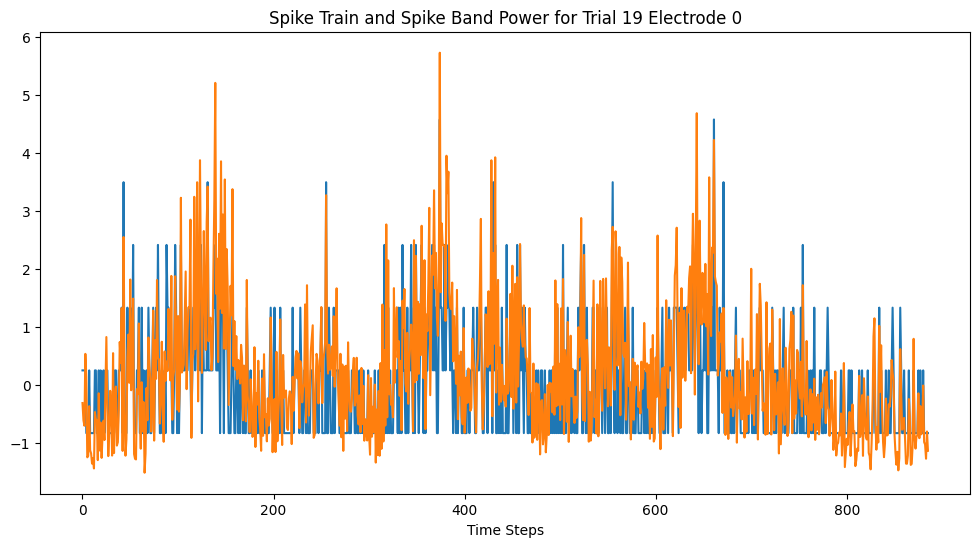

In [ ]:
# visualise correlation between spike_train (from threshold method) and spike-band power

trial = 19 # choose
electrode = 0 # choose between 0-255

spike_train = data['neural_features'][trial][:,electrode]
spike_band_power = data['neural_features'][trial][:,electrode+256]

plt.figure(figsize=(12, 6))
plt.plot(spike_train)
plt.plot(spike_band_power)
plt.title(f'Spike Train and Spike Band Power for Trial {trial} Electrode {electrode}')
plt.xlabel('Time Steps')
plt.show()